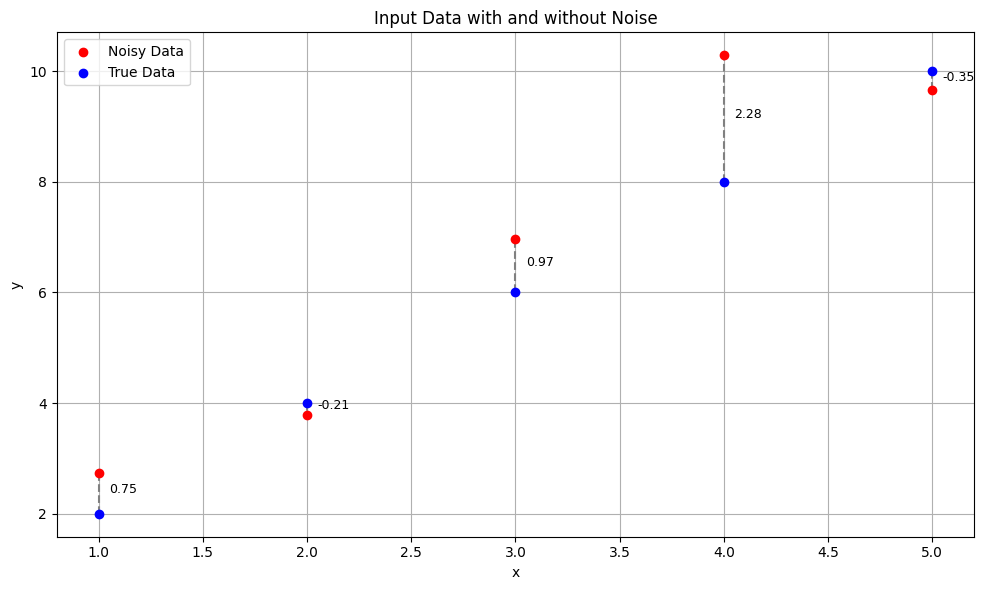

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
x = np.array([1, 2, 3, 4, 5])
y_true = 2 * x

# Add random noise
np.random.seed(42)
noise = np.random.normal(0, 1.5, size=x.shape)
y_noisy = y_true + noise

# Generate x values for plotting
x_plot = np.linspace(1, 5, 100).reshape(-1, 1)

# Plot the input data with noise and without noise
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='red', label='Noisy Data', zorder=5)
plt.scatter(x, y_true, color='blue', label='True Data', zorder=4)

# Draw lines between true and noisy data points and annotate noise
for xi, yt, yn in zip(x, y_true, y_noisy):
    plt.plot([xi, xi], [yt, yn], color='gray', linestyle='--', zorder=3)
    noise_value = yn - yt
    plt.text(xi + 0.05, (yt + yn) / 2, f"{noise_value:.2f}", fontsize=9, color='black')

plt.title('Input Data with and without Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("noise_annotation_plot.png")
plt.show()

In [3]:
# Construct polynomila regression model with degree 1
# Degree 1 polynomial regression is equivalent to linear regression Y = mX + b

#1. Construct a Design Matrix for degree 1 polynomial regression
X = x.reshape(-1, 1)  # Reshape x to be a 2D array

#Include bias term in the design matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for the bias term
 
# print the design matrix
print("Design Matrix for Degree 1 Polynomial Regression:")  
print(X)


Design Matrix for Degree 1 Polynomial Regression:
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [4]:
# Compute (X * X^T) and its inverse
XT_X = np.dot(X.T, X)
XT_X_inv = np.linalg.inv(XT_X)

# Compute X^T * y
XT_y = np.dot(X.T, y_noisy) 

# Compute the coefficients (weights) without noise
XT_y_true = np.dot(X.T, y_true)
weights_true = np.dot(XT_X_inv, XT_y_true)
print("\nComputed Weights (Bias and Slope) without noise:")
print(weights_true)

# Compute the coefficients (weights) with noisy data
weights = np.dot(XT_X_inv, XT_y)
print("\nComputed Weights (Bias and Slope) when data is noisy:")
print(weights)




Computed Weights (Bias and Slope) without noise:
[1.77635684e-15 2.00000000e+00]

Computed Weights (Bias and Slope) when data is noisy:
[0.59870287 2.02993387]


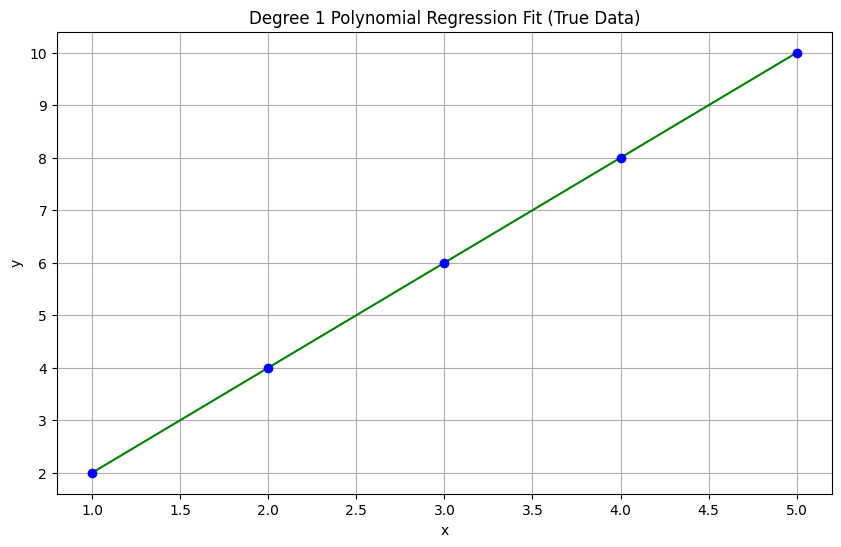

In [5]:
# Predict y using weights for true data
y_pred_true = np.dot(X, weights_true)

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_true, color='blue', label='True Data', zorder=4)   
plt.plot(x, y_pred_true, color='green', label='Fitted Line (True Data)', zorder=3)
plt.title('Degree 1 Polynomial Regression Fit (True Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()




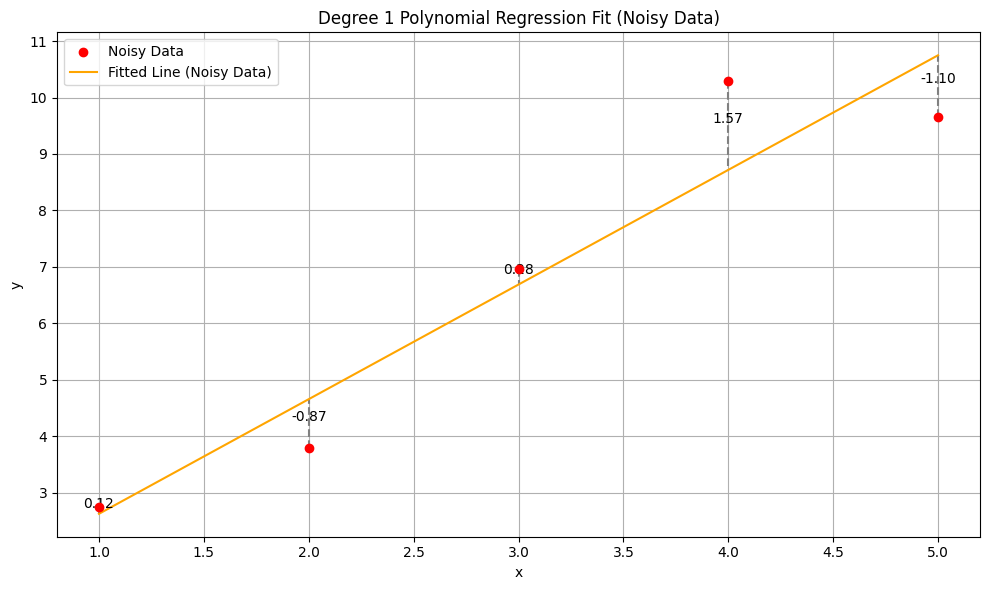

In [6]:
# Predict using the computed weights for noisy data
y_pred = np.dot(X, weights) 

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='red', label='Noisy Data', zorder=4)
plt.plot(x, y_pred, color='orange', label='Fitted Line (Noisy Data)', zorder=3)

# Draw vertical lines and annotate errors
for xi, yi, yp in zip(x, y_noisy, y_pred):
    plt.plot([xi, xi], [yi, yp], 'gray', linestyle='--', zorder=2)
    error = yi - yp
    plt.text(xi, (yi + yp) / 2, f"{error:.2f}", color='black', ha='center', va='bottom')

plt.title('Degree 1 Polynomial Regression Fit (Noisy Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("noisy_fit_with_errors.png")
plt.show()

In [7]:
# Degree 2 Polynomial Regression
# y = ax^2 + bx + c

# Construct a Design Matrix for degree 2 polynomial regression

# Reshape x to be a column vector
X = x.reshape(-1, 1)

# Include bias term and x^2 term
X_design = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
print("\nDesign Matrix for Degree 2 Polynomial Regression:")  
print(X_design)



Design Matrix for Degree 2 Polynomial Regression:
[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


In [8]:
# compute (X * X^T) and its inverse and then (X^T * y) to get weights
XT_X = np.dot(X_design.T, X_design)
XT_X_inv = np.linalg.inv(XT_X)
XT_y = np.dot(X_design.T, y_noisy)
weights_deg2 = np.dot(XT_X_inv, XT_y)
print("\nComputed Weights (Degree 2 Polynomial Regression with noise):")
print(weights_deg2)


Computed Weights (Degree 2 Polynomial Regression with noise):
[-1.01756294  3.41530456 -0.23089512]


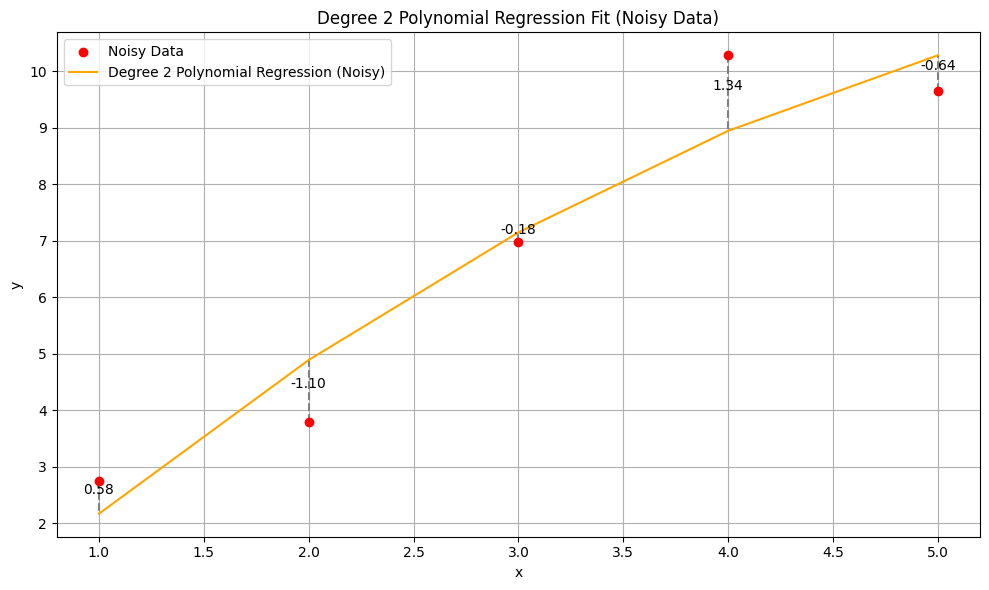

In [9]:
# predict using the computed weights
y_pred_deg2 = np.dot(X_design, weights_deg2)


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='red', label='Noisy Data', zorder=4)
plt.plot(x, y_pred_deg2, color='orange', label='Degree 2 Polynomial Regression (Noisy)', zorder=3)

# Draw vertical lines and annotate errors
for xi, yi, yp in zip(x, y_noisy, y_pred_deg2):
    plt.plot([xi, xi], [yi, yp], 'gray', linestyle='--', zorder=2)
    error = yi - yp
    plt.text(xi, (yi + yp) / 2, f"{error:.2f}", color='black', ha='center', va='bottom')

plt.title('Degree 2 Polynomial Regression Fit (Noisy Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
# Degree 5 Polynomial Regression
# y = a5*x^5 + a4*x^4 + a3*x^3 + a2*x^2 + a1*x + a0

# Cosntruct a Design Matrix for degree 5 polynomial regression
X = x.reshape(-1, 1)
X_design_deg5 = np.hstack((np.ones((X.shape[0], 1)), X, X**2, X**3, X**4, X**5))

In [11]:
# Compute (X * X^T) and its inverse and then (X^T * y) to get weights
XT_X = np.dot(X_design_deg5.T, X_design_deg5)
XT_X_inv = np.linalg.inv(XT_X)
XT_y = np.dot(X_design_deg5.T, y_noisy)
weights_deg5 = np.dot(XT_X_inv, XT_y)

In [12]:
# Predict y values for plotting regression lines
y_pred_deg5 = np.dot(X_design_deg5, weights_deg5)

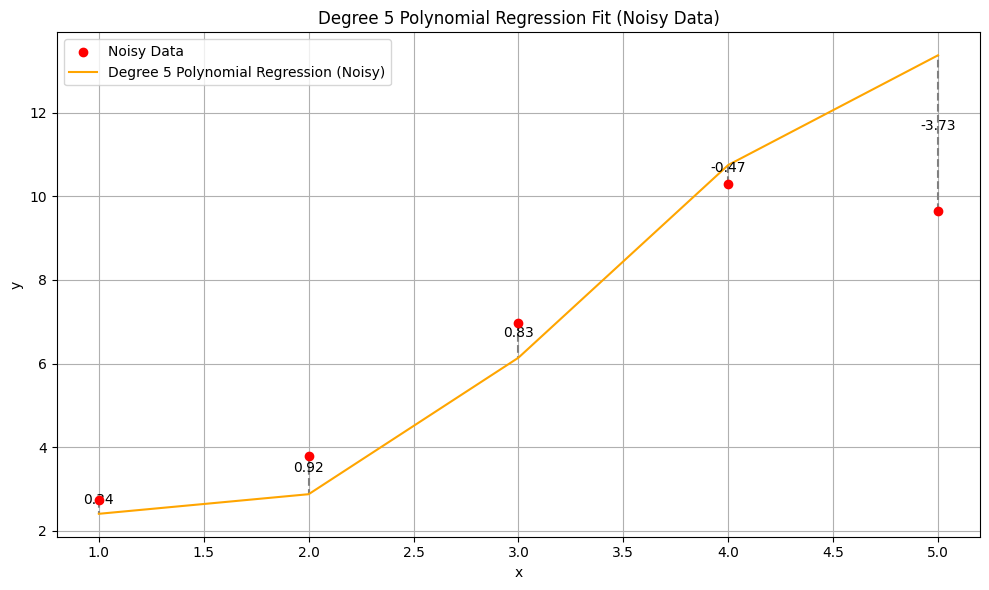

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='red', label='Noisy Data', zorder=4)
plt.plot(x, y_pred_deg5, color='orange', label='Degree 5 Polynomial Regression (Noisy)', zorder=3)

# Draw vertical lines and annotate errors
for xi, yi, yp in zip(x, y_noisy, y_pred_deg5):
    plt.plot([xi, xi], [yi, yp], 'gray', linestyle='--', zorder=2)
    error = yi - yp
    plt.text(xi, (yi + yp) / 2, f"{error:.2f}", color='black', ha='center', va='bottom')

plt.title('Degree 5 Polynomial Regression Fit (Noisy Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



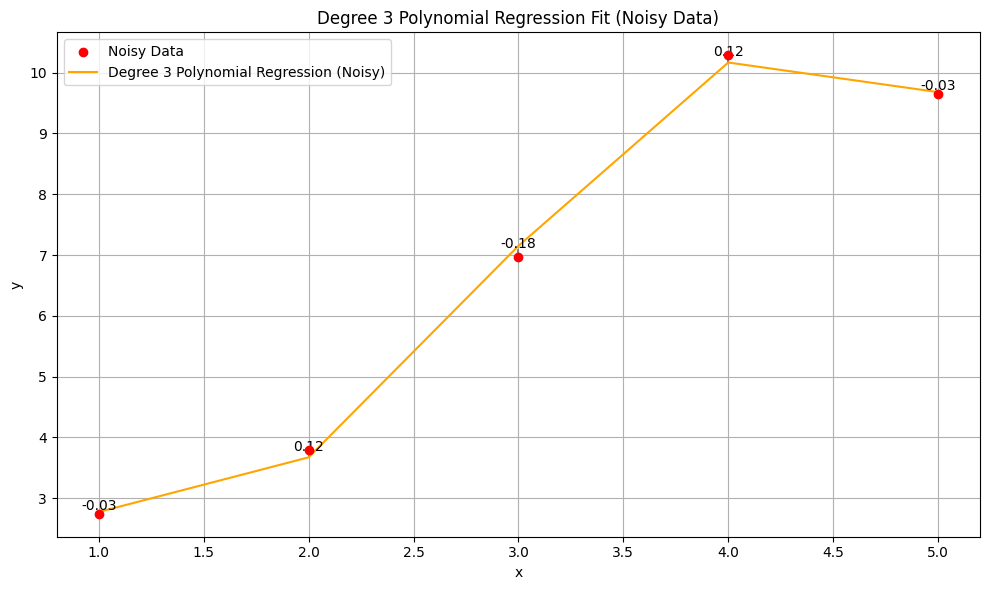

In [14]:
# Degree 3 Polynomial Regression
# y = a3*x^3 + a2*x^2 + a1*x + a0

# Cosntruct a Design Matrix for degree 5 polynomial regression
X = x.reshape(-1, 1)
X_design_deg3 = np.hstack((np.ones((X.shape[0], 1)), X, X**2, X**3))

# Compute (X * X^T) and its inverse and then (X^T * y) to get weights
XT_X = np.dot(X_design_deg3.T, X_design_deg3)
XT_X_inv = np.linalg.inv(XT_X)
XT_y = np.dot(X_design_deg3.T, y_noisy)
weights_deg3 = np.dot(XT_X_inv, XT_y)

# Predict y values for plotting regression lines
y_pred_deg3 = np.dot(X_design_deg3, weights_deg3)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='red', label='Noisy Data', zorder=4)
plt.plot(x, y_pred_deg3, color='orange', label='Degree 3 Polynomial Regression (Noisy)', zorder=3)

# Draw vertical lines and annotate errors
for xi, yi, yp in zip(x, y_noisy, y_pred_deg3):
    plt.plot([xi, xi], [yi, yp], 'gray', linestyle='--', zorder=2)
    error = yi - yp
    plt.text(xi, (yi + yp) / 2, f"{error:.2f}", color='black', ha='center', va='bottom')

plt.title('Degree 3 Polynomial Regression Fit (Noisy Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



In [15]:
# Print the error between actual y and predicted y for degree 1 and degree 2 polynomial regression predictions
error_deg1 = y_noisy - y_pred
error_deg2 = y_noisy - y_pred_deg2
error_deg3 = y_noisy - y_pred_deg3
error_deg5 = y_noisy - y_pred_deg5

# print as table format
print("\nError Comparison Table:")
print("Data Point\tDegree 1 Error\tDegree 2 Error\tDegree 3 Error\tDegree 5 Error")
for i in range(len(x)):
    print(f"{i+1}\t\t{error_deg1[i]:.2f}\t\t{error_deg2[i]:.2f}\t\t{error_deg3[i]:.2f}\t\t{error_deg5[i]:.2f}")   




Error Comparison Table:
Data Point	Degree 1 Error	Degree 2 Error	Degree 3 Error	Degree 5 Error
1		0.12		0.58		-0.03		0.34
2		-0.87		-1.10		0.12		0.92
3		0.28		-0.18		-0.18		0.83
4		1.57		1.34		0.12		-0.47
5		-1.10		-0.64		-0.03		-3.73


In [16]:
# Print the RMSE between actual y and predicted y for degree 1 and degree 2 polynomial regression predictions

rmse_deg1 = np.sqrt(np.mean((y_noisy - y_pred) ** 2))
rmse_deg2 = np.sqrt(np.mean((y_noisy - y_pred_deg2) ** 2))
rmse_deg3 = np.sqrt(np.mean((y_noisy - y_pred_deg3) ** 2))
rmse_deg5 = np.sqrt(np.mean((y_noisy - y_pred_deg5) ** 2))

# print as table format
print("\nRMSE Comparison Table:")
print("Degree\tRMSE")
print(f"1\t{rmse_deg1:.2f}")
print(f"2\t{rmse_deg2:.2f}") 
print(f"3\t{rmse_deg3:.2f}")
print(f"5\t{rmse_deg5:.2f}")




RMSE Comparison Table:
Degree	RMSE
1	0.95
2	0.87
3	0.11
5	1.77


In [17]:
# Demonstration of MSE with L2 Norm Regularization (Ridge Regression or Regularized Least Squares)
# Using Degree three polynomial regression

In [18]:
# Function to compute weights with Ridge Regression

def ridge_regression(X, y, lambda_reg):
    I = np.eye(X.shape[1])  # Identity matrix
    XT_X = np.dot(X.T, X)
    regularized_matrix = XT_X + lambda_reg * I
    regularized_matrix_inv = np.linalg.inv(regularized_matrix)
    XT_y = np.dot(X.T, y)
    weights_ridge = np.dot(regularized_matrix_inv, XT_y)
    return weights_ridge

In [19]:
# set lamda = 0, 0.5, 0.6, 0.9, 1 and 2
lambda_values = [0, 0.5, 0.6, 0.9, 1, 2]

# Compute RMSE for each lambda
print("\nRidge Regression RMSE Comparison Table (Degree 3 Polynomial):")

for lambda_reg in lambda_values:
    weights_ridge = ridge_regression(X_design_deg3, y_noisy, lambda_reg)
    y_pred_ridge = np.dot(X_design_deg3, weights_ridge)
    rmse_ridge = np.sqrt(np.mean((y_noisy - y_pred_ridge) ** 2))
    print(f"Lambda: {lambda_reg}\tRMSE: {rmse_ridge:.2f}")
    


Ridge Regression RMSE Comparison Table (Degree 3 Polynomial):
Lambda: 0	RMSE: 0.11
Lambda: 0.5	RMSE: 0.64
Lambda: 0.6	RMSE: 0.64
Lambda: 0.9	RMSE: 0.65
Lambda: 1	RMSE: 0.66
Lambda: 2	RMSE: 0.68


In [20]:
# generate sine wave data and apply polynomial regression and compare with ridge regression

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate sine wave data
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)

# Prepare polynomial features
degree = 5
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polynomial Regression
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_poly)

# Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_poly)

# Calculate Mean Squared Error
mse_poly = mean_squared_error(y, y_pred_poly)
mse_ridge = mean_squared_error(y, y_pred_ridge)

# Create plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Original Data'))
fig.add_trace(go.Scatter(x=x, y=y_pred_poly, mode='lines', name='Polynomial Regression'))
fig.add_trace(go.Scatter(x=x, y=y_pred_ridge, mode='lines', name='Ridge Regression'))
fig.update_layout(title=f'Polynomial vs Ridge Regression\nMSE Poly: {mse_poly:.4f}, MSE Ridge: {mse_ridge:.4f}',
                  xaxis_title='x',
                  yaxis_title='y')

fig.show()
# Output MSE values
print(f"Mean Squared Error (Polynomial Regression): {mse_poly:.4f}")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.4f}")

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'